In [203]:
# Working with custom datasets
import torch

In [204]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [205]:
import requests
import zipfile
from pathlib import Path
import os

data_path = Path("data")
image_path = data_path/"pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory already exists...")
else:
    image_path.mkdir(parents=True, exist_ok=True)

    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print(f"Downloading pizza, steak, sushi data...")
        f.write(request.content)

    with zipfile.ZipFile(data_path/ "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping data...")
        zip_ref.extractall(image_path)
    os.remove(data_path / "pizza_steak_sushi.zip")

data\pizza_steak_sushi directory already exists...


In [206]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [207]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'


In [208]:
train_dir = image_path / "train"
test_dir = image_path/ "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

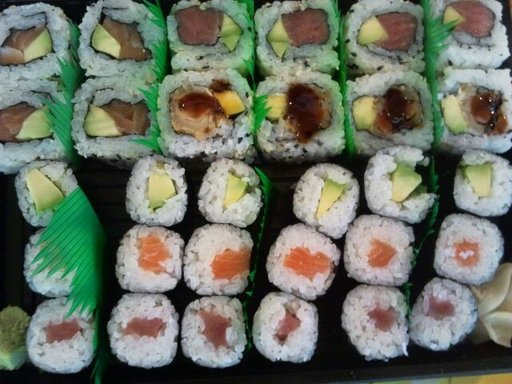

In [209]:
from PIL import Image
import random

torch.manual_seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

img

(-0.5, 511.5, 383.5, -0.5)

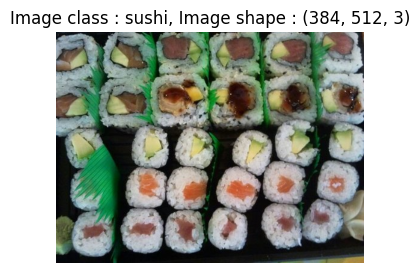

In [210]:
import matplotlib.pyplot as plt
import numpy as np


# Converting image to a numpy array

image_array = np.asarray(img)

plt.figure(figsize=(5,3))
plt.imshow(image_array)
plt.title(f"Image class : {image_class}, Image shape : {image_array.shape}")
plt.axis(False)

In [211]:
# Transforming data

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [212]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [213]:
image_array

array([[[  9,  22,  30],
        [  2,  15,  23],
        [  9,  19,  28],
        ...,
        [ 81,  58,  42],
        [109,  78,  58],
        [122,  90,  67]],

       [[ 13,  23,  32],
        [  4,  15,  21],
        [ 12,  21,  28],
        ...,
        [ 80,  57,  41],
        [113,  85,  64],
        [134, 102,  79]],

       [[  7,  16,  23],
        [ 13,  22,  27],
        [ 13,  20,  26],
        ...,
        [ 73,  50,  36],
        [109,  80,  62],
        [134, 103,  82]],

       ...,

       [[ 10,   7,  14],
        [  8,   7,  13],
        [  6,   5,  11],
        ...,
        [173, 132,  68],
        [173, 132,  68],
        [173, 132,  68]],

       [[ 12,   7,  14],
        [  9,   6,  13],
        [  7,   4,  11],
        ...,
        [173, 132,  66],
        [174, 130,  65],
        [173, 129,  64]],

       [[ 12,   7,  14],
        [ 11,   6,  13],
        [  9,   4,  11],
        ...,
        [171, 131,  62],
        [172, 128,  63],
        [170, 126,  61]]

In [214]:
data_transform(img)

tensor([[[0.0745, 0.1412, 0.1490,  ..., 0.6706, 0.4431, 0.2157],
         [0.2431, 0.4745, 0.4941,  ..., 0.5843, 0.5608, 0.2078],
         [0.4392, 0.5529, 0.5216,  ..., 0.4588, 0.4941, 0.1647],
         ...,
         [0.2039, 0.2353, 0.0745,  ..., 0.1529, 0.1725, 0.1922],
         [0.0235, 0.0196, 0.0196,  ..., 0.4588, 0.5020, 0.5333],
         [0.0196, 0.0157, 0.0196,  ..., 0.6588, 0.6549, 0.6627]],

        [[0.0902, 0.1569, 0.1804,  ..., 0.6902, 0.4667, 0.1765],
         [0.2745, 0.5176, 0.5529,  ..., 0.5843, 0.5765, 0.1765],
         [0.4902, 0.6196, 0.5922,  ..., 0.4275, 0.5137, 0.1608],
         ...,
         [0.2824, 0.3176, 0.1098,  ..., 0.1765, 0.2000, 0.2157],
         [0.0314, 0.0353, 0.0235,  ..., 0.4314, 0.4627, 0.4784],
         [0.0235, 0.0235, 0.0235,  ..., 0.5412, 0.5412, 0.5294]],

        [[0.1098, 0.1725, 0.2078,  ..., 0.7059, 0.4863, 0.1608],
         [0.3059, 0.5451, 0.5961,  ..., 0.5961, 0.6039, 0.1725],
         [0.5255, 0.6667, 0.6314,  ..., 0.4353, 0.5412, 0.

In [215]:
data_transform_alternate = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


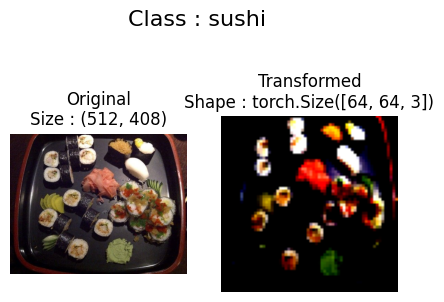

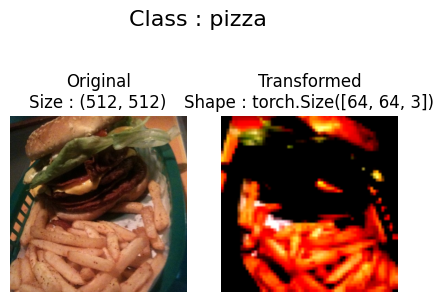

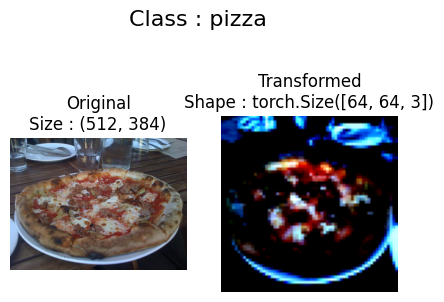

In [251]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:

            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5,4))
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize : {f.size}")
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape : {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class : {image_path.parent.stem}", fontsize=16)


plot_transformed_images(image_paths=image_path_list, transform=data_transform_alternate, seed=42)

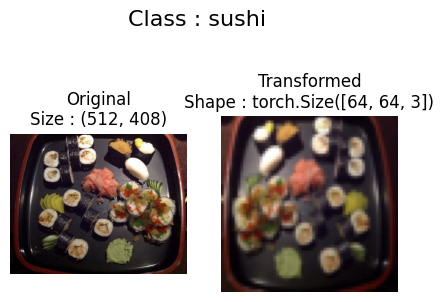

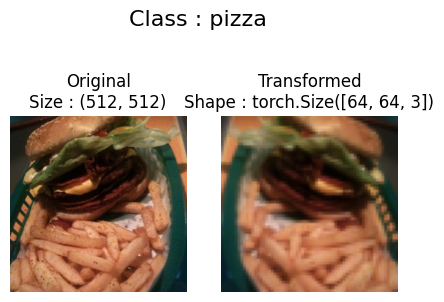

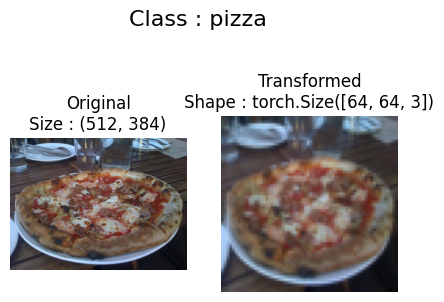

In [252]:
plot_transformed_images(image_paths=image_path_list, transform=data_transform, seed=42)

In [218]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [219]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [220]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [221]:
img, label = train_data[0]
img.shape, label, class_names[label]

(torch.Size([3, 64, 64]), 0, 'pizza')

(-0.5, 63.5, 63.5, -0.5)

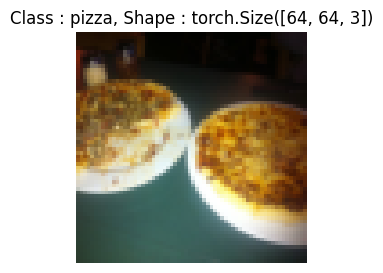

In [222]:
plt.figure(figsize=(4,3))
plt.imshow(img.permute(1,2,0))
plt.title(f"Class : {class_names[label]}, Shape : {img.permute(1,2,0).shape}")
plt.axis(False)

In [223]:
# Turning dataset into dataloader

from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data, batch_size=16, num_workers=2, shuffle=True)

# num_workers defines how many cpu cores we want to use to load our data, the more the better.

test_dataloader = DataLoader(dataset=test_data, batch_size=16, shuffle=False, num_workers=2)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2534f4f7460>,
 <torch.utils.data.dataloader.DataLoader at 0x2534f52dc00>)

In [224]:
img, label = train_dataloader.dataset[0]
print(f"Image shape : {img.shape}")
print(f"Label : {label}")

Image shape : torch.Size([3, 64, 64])
Label : 0


In [225]:
img, label = next(iter(train_dataloader))
print(f"Image shape : {img.shape}")
print(f"Label shape : {label.shape}")

Image shape : torch.Size([16, 3, 64, 64])
Label shape : torch.Size([16])


In [226]:
# Replicating torchvision.datasets.ImageFolder

import os
import pathlib
import torch
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset
from typing import Tuple, Dict, List

In [227]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [228]:
"""
Function :
1. Get the class names using os.scandir() to traverse a target directory
2. Raise an error if the class names aren't found.
3. Turn the class names into a dict and a list and return them.
"""

# Set up the target directory
target_directory = train_dir
print(f"Target dir : {target_directory}")

# Get the class names
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])

class_names_found

Target dir : data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [229]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str,int]] :
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    if not classes:
        raise FileNotFoundError(f"couldn't find any classes is {directory}")

    # Creating the dictionary of classes
    class_to_idx = {class_name : i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

In [230]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [231]:
"""
1. Subclass 'torch.utils.data.Dataset'
2. Init our subclass with a target directory as well as a transform if we'd like to transform our data.
3. Create several attributes:
    > paths - paths to the images
    > transform - the transform we'd like to use
    > classes - a list of the target classes
    > class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to 'load_images()', this function will open an image
5. Overwrite the '__len()__' method to return the length of our dataset
6. Overwrite the '__getitem()__' method to return a given sample when passed an index
"""

"\n1. Subclass 'torch.utils.data.Dataset'\n2. Init our subclass with a target directory as well as a transform if we'd like to transform our data.\n3. Create several attributes:\n    > paths - paths to the images\n    > transform - the transform we'd like to use\n    > classes - a list of the target classes\n    > class_to_idx - a dict of the target classes mapped to integer labels\n4. Create a function to 'load_images()', this function will open an image\n5. Overwrite the '__len()__' method to return the length of our dataset\n6. Overwrite the '__getitem()__' method to return a given sample when passed an index\n"

In [232]:
# Write a custom dataset class

from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):

    def __init__(self, targ_dir : str, transform=None):
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(targ_dir)

    def load_image(self, index : int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)

    def  __len__(self) -> int:
        return len(self.paths)

    def __getitem__(self, index : int) -> Tuple[torch.Tensor, int]:
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx

In [233]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir, transform=data_transform)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, transform=data_transform)

In [234]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [235]:
next(iter(train_data_custom))

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [236]:
train_data_custom[0][0].shape

torch.Size([3, 64, 64])

In [237]:
# Checking if the values are equal or not
torch.eq(train_data_custom[0][0], train_data[0][0])

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [ True, False, False,  ..., False, False,  True],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [

In [238]:
def plot_random_images_and_compare(dataset : torch.utils.data.Dataset, classes : List[str] = None, n : int = 5, seed : int = None):
    if n>5 or n<1:
        n=5

    if seed:
        random.seed(seed)
    samples = random.sample(range(len(dataset)), k=n)

    fig, ax =   plt.subplots(nrows=n, ncols=2, figsize=(5,3*n))

    for i, idx in enumerate(samples):
        # 1. ax[i].imshow(dataset.load_image(idx))
        # alternative of 1.
        image, label = dataset[idx]
        ax[i][0].imshow(image.permute(1,2,0))
        ax[i][0].axis(False)
        # 2. ax[i].set_title(f"Class : {classes[dataset.__getitem__(idx)[1]]}")
        # alternative of 2.
        ax[i][0].set_title(f"Class : {classes[label]}")
        ax[i][1].imshow(dataset.load_image(idx))
        ax[i][1].axis(False)


In [239]:
def plot_random_images(dataset : torch.utils.data.Dataset, classes : List[str] = None, n : int = 5, seed : int = None):
    if n>5 or n<1:
        n=5

    if seed:
        random.seed(seed)
    samples = random.sample(range(len(dataset)), k=n)


    for i, idx in enumerate(samples):
        image, label = dataset[idx]
        plt.subplot(1, n, i+1)
        # 1. ax[i].imshow(dataset.load_image(idx))
        # alternative of 1.
        plt.imshow(image.permute(1,2,0))
        plt.axis(False)
        # 2. ax[i].set_title(f"Class : {classes[dataset.__getitem__(idx)[1]]}")
        # alternative of 2.
        plt.title(classes[label])


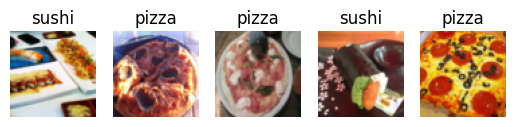

In [240]:
# Plotting the train_data from ImageFolder
plot_random_images(train_data, train_data.classes, n = 5, seed = 42)

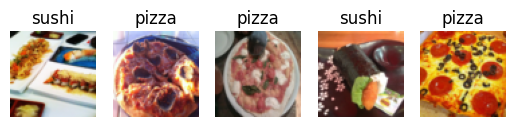

In [241]:
# plotting the images from custom function
plot_random_images(train_data_custom, train_data_custom.classes, n = 5, seed = 42)

In [242]:
# Turning custom data into DataLoader's

from torch.utils.data import DataLoader
import os

BATCH_SIZE = 16

train_dataloader_custom = DataLoader(dataset=train_data_custom,batch_size=BATCH_SIZE, num_workers=0, shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom, batch_size=BATCH_SIZE, num_workers=0, shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x2534dde4a30>,
 <torch.utils.data.dataloader.DataLoader at 0x2534dde5540>)

In [243]:
img, label = next(iter(train_dataloader_custom))
img.shape, len(label)

(torch.Size([16, 3, 64, 64]), 16)

In [244]:
# Doing the TrivialAugmentWide

from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [245]:
# Get all image paths
from pathlib import Path

path = Path("data/pizza_steak_sushi")
image_paths = list(path.glob("*/*/*.jpg"))

len(image_paths), image_paths[:5]

(300,
 [WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
  WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
  WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
  WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
  WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg')])

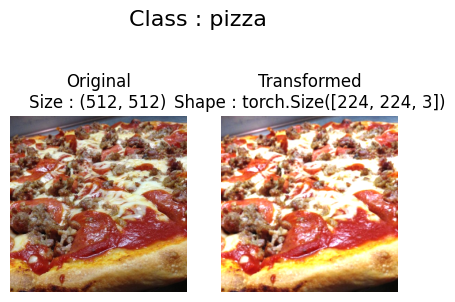

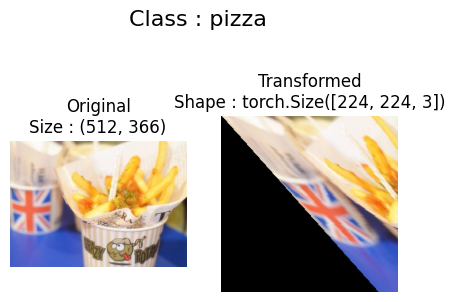

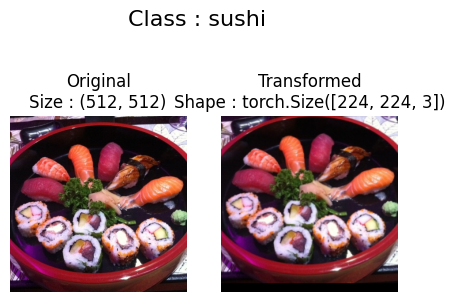

In [253]:
plot_transformed_images(image_paths=image_paths, transform=train_transforms, n=3, seed=None)